# 回归模型
- 姓名：曹维伦
- 学号：2010699
- 专业：信息安全

## 基本要求：
将数据集winequality-white.csv按照4:1划分为训练集和测试集。  
   
    1. 构造线性回归模型，并采用批量梯度下降和随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
    2. 对于批量梯度下降和随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。  

特别需要注意：
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理

### 导入需要的包

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 导入数据集并将其以二维数组储存

In [39]:
d = pd.read_csv("winequality-white.csv")
data = np.array(d)
print(data)
print(data.shape)

[[ 7.    0.27  0.36 ...  0.45  8.8   6.  ]
 [ 6.3   0.3   0.34 ...  0.49  9.5   6.  ]
 [ 8.1   0.28  0.4  ...  0.44 10.1   6.  ]
 ...
 [ 6.5   0.24  0.19 ...  0.46  9.4   6.  ]
 [ 5.5   0.29  0.3  ...  0.38 12.8   7.  ]
 [ 6.    0.21  0.38 ...  0.32 11.8   6.  ]]
(4898, 12)


### 分层采样思想
    1. 算出各个quality总数的1/5共有多少(四舍五入)
    2. shuffle整个data以达到随机采样
    3. 从0开始取quality的1/5作为测试集，剩下的作为训练集

(3920, 11) (3920, 1) (978, 11) (978, 1)


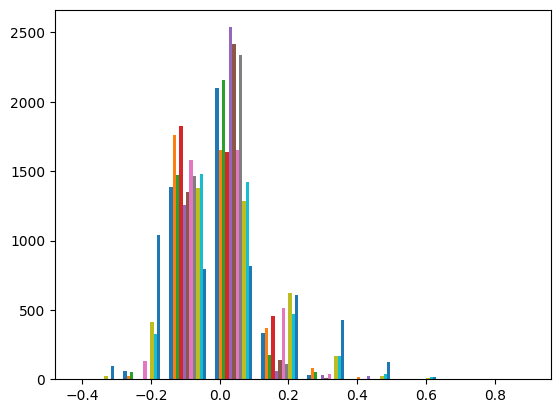

In [40]:
def Normalize(x):
    x = (x - np.mean(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0))
    return x


q = np.zeros([2,7])
j = 0
for i in range(data.shape[0]):
    if data[i][11] not in q[0]:
        q[0][j] = data[i][11]
        j += 1
    else:
        q[1][q[0].tolist().index(data[i][11])] += 0.2
q[1] = q[1].round()

test = []
train = []
np.random.shuffle(data)
for i in range(data.shape[0]):
    if(q[1][q[0].tolist().index(data[i][11])] > 0):
        q[1][q[0].tolist().index(data[i][11])] -= 1
        test.append(data[i])
    else:
        train.append(data[i])

test = np.array(test)
train = np.array(train)
train_X = train[:,:-1]
train_y = train[:,11:]
test_X = test[:,:-1]
test_y = test[:,11:]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

train_X = Normalize(train_X)
test_X = Normalize(test_X)

plt.hist(train_X)
plt.show()

In [41]:
class LR:

    def __init__(self, alpha):
        self.alpha = alpha

    # 批量梯度下降
    def bgd_fit(self, times, X, y):
        X = np.asarray(X)
        y = np.asarray(y)

        # theta取随机值
        self.theta = np.random.randn(X.shape[1] + 1,1)
        # 记录损失值
        self.loss = []

        for i in range(times):
            # f(x(i),theta)
            y_pre = np.dot(X, self.theta[1:]) + self.theta[0]
            err = y - y_pre
            self.loss.append(np.sum(err ** 2) / (2 * X.shape[0]))
            # 依照公式更新theta
            self.theta[0] += self.alpha * np.sum(err)/X.shape[0]
            self.theta[1:] += self.alpha * np.dot(X.T, err)/X.shape[0]
            
    # 隨機梯度下降
    def sgd_fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)

        self.theta = np.random.randn(X.shape[1] + 1, 1)
        self.loss = []

        for i in range(X.shape[0]):
            # 只取一个样本
            y_pre = np.dot(X[i], self.theta[1:]) + self.theta[0]
            err = y[i] - y_pre
            self.loss.append(np.sum(err ** 2) / 2)
            # 依照公式更新theta
            self.theta[0] += self.alpha * err
            self.theta[1:] += self.alpha * np.dot(X[i].T, np.tile(err, (X[i].shape[0], 1)))
    
    # 岭回归(解析解)
    def ridge_fit(self, times, lamda, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        X = np.column_stack((np.ones(X.shape[0]), X))
        self.theta = np.random.randn(X.shape[1], 1)
        self.loss = []

        tmp = np.linalg.inv(np.dot(X.T, X) + lamda * np.eye(X.shape[1]))
        for i in range(times):
            y_pre = np.dot(X, self.theta)
            err = y - y_pre
            self.loss.append(np.sum(err ** 2) / (2 * X.shape[0]) + lamda * np.sum(self.theta ** 2))
            self.theta = np.dot(np.dot(tmp, X.T), y_pre)
    
    # 预测函数(似乎用不到)
    def predict(self, X):
        X = np.asarray(X)
        result = np.dot(X, self.theta[1:]) + self.theta[0]
        return result

批量梯度下降訓練集MSE
[20.98054499841198, 13.572607677675913, 8.82879119106531, 5.790310575417397, 3.8435012152517665, 2.5955820936698477, 1.795143214600063, 1.2812566670563097, 0.950906964444537, 0.7381458404865706, 0.6007507982545808, 0.5116861455899555, 0.4536376924192931, 0.41551465077004784, 0.3902105939608175, 0.3731702550492587, 0.3614720970488114, 0.35324100608234593, 0.3472722875034688, 0.34279091625936897, 0.3392973670094842, 0.33646886956727773, 0.33409614851721886, 0.33204288273838645, 0.3302197140842243, 0.32856757458329816, 0.32704698342029725, 0.3256311695534564, 0.32430164692094615, 0.32304536281959517, 0.3218528560710523, 0.32071706394121396, 0.31963254635884125, 0.31859497897386346, 0.3176008197653832, 0.31664708798224844, 0.3157312160428285, 0.3148509490317452, 0.31400427542448367, 0.31318937844826145, 0.31240460120339963, 0.3116484210629288, 0.31091943041284736, 0.31021632179483905, 0.30953787616190764, 0.3088829533801267, 0.30825048438662933, 0.30763946459656216, 0.30704894

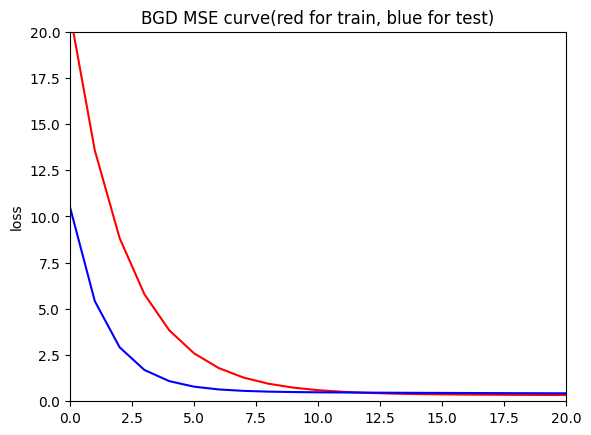

In [42]:
lr_bgd_train = LR(alpha=1.8)
lr_bgd_train.bgd_fit(50, train_X, train_y)
print("批量梯度下降訓練集MSE")
print(lr_bgd_train.loss)
lr_bgd_test = LR(alpha=0.3)
lr_bgd_test.bgd_fit(50, test_X, test_y)
print("批量梯度下降訓練集MSE")
print(lr_bgd_test.loss)

plt.xlim(0,20)
plt.ylim(0,20)
plt.title('BGD MSE curve(red for train, blue for test)')
plt.ylabel('loss')
plt.plot(lr_bgd_train.loss, 'r')
plt.plot(lr_bgd_test.loss, 'b')

plt.show()

很明显看到MSE损失函数曲线趋于0，而alpha取值与更新theta的公式后项是否/m大大相关，网上大多算法没有/m，因此取值皆为0.000x，而给定的公式中除了m因此alpha值为1.多與0.多，故参数的选择需视更新theta的方式来选择

In [43]:
lr_sgd_train = LR(alpha=0.001)
lr_sgd_train.sgd_fit(train_X, train_y)
print("随机梯度下降訓練集MSE")
print(lr_sgd_train.loss)
lr_sgd_test = LR(alpha=0.007)
lr_sgd_test.sgd_fit(test_X, test_y)
print("随机梯度下降訓練集MSE")
print(lr_sgd_test.loss)

随机梯度下降訓練集MSE
[11.050481461703397, 15.455556554115761, 13.133947238371327, 14.16546590937548, 13.901540055667551, 9.967454724912018, 14.130431703455956, 10.672265137877488, 12.34995720257734, 10.701797709711274, 14.173438467624251, 12.576778688806996, 10.26431177070222, 14.007353387561416, 13.162550516441637, 12.326563178272753, 12.52812184227134, 10.648835855515372, 17.329256079389573, 12.036780901147633, 15.568126660304854, 12.321947427184293, 10.710294341240767, 6.347138149622, 10.860647643370495, 30.16614418669084, 12.303486570116297, 7.828675490986894, 10.49471506699424, 6.1896605495831984, 10.742208362854834, 10.954005470213653, 8.56296657877298, 13.195824646046137, 12.33930995339888, 16.216492854417066, 12.672278496315672, 8.74480252400837, 14.493644952503196, 13.960452323084574, 14.836260176942181, 11.728415230231963, 9.80581396667451, 9.784561077965265, 14.707126530079615, 15.653786915942066, 8.559040577910935, 15.173396424465123, 12.158755686144948, 14.279316533742655, 16.0672

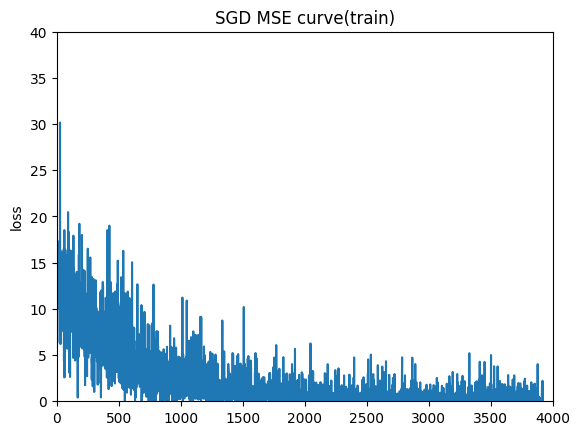

In [44]:
plt.xlim(0,4000)
plt.ylim(0,40)
plt.title('SGD MSE curve(train)')
plt.ylabel('loss')
plt.plot(lr_sgd_train.loss)
plt.show()

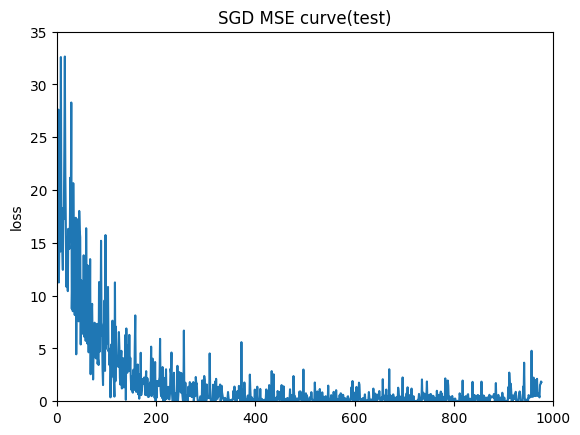

In [45]:
plt.xlim(0,1000)
plt.ylim(0,35)
plt.title('SGD MSE curve(test)')
plt.ylabel('loss')
plt.plot(lr_sgd_test.loss)
plt.show()

可以看到函数依然收敛，但是由于追求速度，每次更新只用一组样本，因此出现大幅抖动与噪声，且结果不一定为最优

## 中级要求：
    探究回归模型在机器学习和统计学上的差异。回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。  

　　诺奖得主托马斯·萨金特曾经说过：人工智能其实就是统计学，只不过用了一个很华丽的辞藻。而关于这个问题，上网搜索第一个看到的答案便是"机器学习和统计的主要区别在于它们的目的，机器学习模型旨在使最准确的预测成为可能，统计模型是为推断变量之间的关系而设计的"，但这样一具简单的说辞没有让我完全理解其中差异，因此我在我阅读了比较多的材料后有了以下见解。
  
　　机器学习属于工科，而其研究的方向以及内容都是实用导向的，所以以线性回归来说，机器学习的目的就是透过训练机器在多个变量之间得出我们想要的，尽可能准确的结果。换言之，我们并不在乎过程的可解释性。以这次作业来说吧，我写代码的过程就是分层划分训练集和测试集，参考梯度下降的公式以及最后做参数的调整，而我的最终目的就是希望最后的MSE曲线能够收敛。至于是怎么办到的，过程中做了哪些事情，我的理解仅止于数学公式，甚至还一度忘了这是一个预测酒的品质的模型。
　　
  
　　而更偏向理科的统计学则不一样，不需要训练集、测试集，许多情况下，建模的目的是描述数据与输出之间的关系，而不是对数据做预测，是要真正了解变量之间的关系以及如何产生出这个结果，比如说现在要研究中国各地的空气品质，机器学习可以将中国划分为4:1建模，然后更为准确地预测各地的空气品质；但统计学建模则是想知道是哪些因素影响了空气品质，譬如说工厂的数量、是否降雨降雪以及季风因素等等，实际的了解了是哪些因素影响到了空气品质，他们影响的权重又是多少。

　　纵上，确实有说法是说因为现在信息爆炸与算力的显著提升，使得机器学习有了"美化后的统计学"之称，也才会出现实验文挡中的那张ten years challenge meme，但即使技术上来说非常相似，但两者之间实质还是具有本质上的区别，因此我不太认同马斯·萨金特的说法。


## 提高要求：
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法均可）

训练集：
[366.53064236007896, 94.93085767471482, 51.344186534472186, 38.76728955511712, 34.034459714283145, 31.947991478875572, 30.881791944602956, 30.241321117789347, 29.79118163358761, 29.4327771773209, 29.122558640267975, 28.840184690240193, 28.57558139698301, 28.323460116114486, 28.080886934372284, 27.8461494361563, 27.618199567409658, 27.39636517542055, 27.180193558818367, 26.969363292420162, 26.763633036254596, 26.562811164517733, 26.366737469140922, 26.17527202002415, 25.98828833188582, 25.805669149214694, 25.62730383337048, 25.45308673413394, 25.28291616758449, 25.116693767858735, 24.954324069548928, 24.79571423237214, 24.640773853583326, 24.489414834507958, 24.341551280486396, 24.197099421502166, 24.05597754569184, 23.918105940970484, 23.78340684187379, 23.651804379863684, 23.523224536043468, 23.397595095654346, 23.27484560398159, 23.154907323452655, 23.037713191800194, 22.92319778121601, 22.811297258451667, 22.70194934583835, 22.595093283206786, 22.490669790692294, 22.38862103241

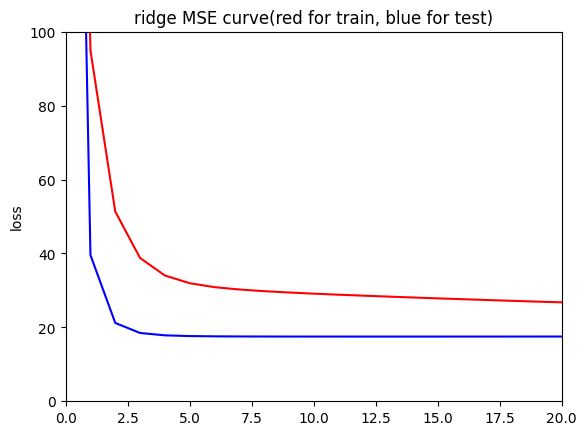

In [46]:
lr_ridge_train = LR(alpha = 0.01)
lr_ridge_train.ridge_fit(100, 50, train_X, train_y)
lr_ridge_test = LR(alpha = 0.01)
lr_ridge_test.ridge_fit(100, 50, test_X, test_y)
print("训练集：")
print(lr_ridge_train.loss)
print("测试集：")
print(lr_ridge_test.loss)

plt.xlim(0,20)
plt.ylim(0,100)
plt.title('ridge MSE curve(red for train, blue for test)')
plt.ylabel('loss')
plt.plot(lr_ridge_train.loss,'r')
plt.plot(lr_ridge_test.loss,'b')
plt.show()

截止日期：10月21日
作业的提交格式参考之前的说明，提交到2120220594@nankai.edu.cn